# Tune DBSCAN parameters

In [15]:
import torch as t
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [4]:
import sys
sys.path.append('..')

## plot k-distance

In [1]:
"""from sklearn.neighbors import NearestNeighbors
import numpy as np

X = embeddings_np
k = 5  # یا هر min_samples که در نظر داری
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, _ = nbrs.kneighbors(X)
d_k = np.sort(distances[:, k-1])
plt.plot(d_k); plt.ylabel("k-NN distance"); plt.xlabel("Points sorted"); plt.show()
"""

'from sklearn.neighbors import NearestNeighbors\nimport numpy as np\n\nX = embeddings_np\nk = 5  # یا هر min_samples که در نظر داری\nnbrs = NearestNeighbors(n_neighbors=k).fit(X)\ndistances, _ = nbrs.kneighbors(X)\nd_k = np.sort(distances[:, k-1])\nplt.plot(d_k); plt.ylabel("k-NN distance"); plt.xlabel("Points sorted"); plt.show()\n'

In [6]:
from utils import extract_encodings
from utils import get_data_loader
from autoencoder import VAEMNIST

model = VAEMNIST()
model.load_state_dict(t.load(f="../models/vae_autoencoder_2.pth"))
_, test_dl = get_data_loader(32)
encodec_vec, true_labels = extract_encodings(model, test_dl)

100.0%
100.0%
100.0%
100.0%


In [20]:
X = encodec_vec
k = 4

nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, _ = nbrs.kneighbors(X)
d_k = distances[:, k-1]


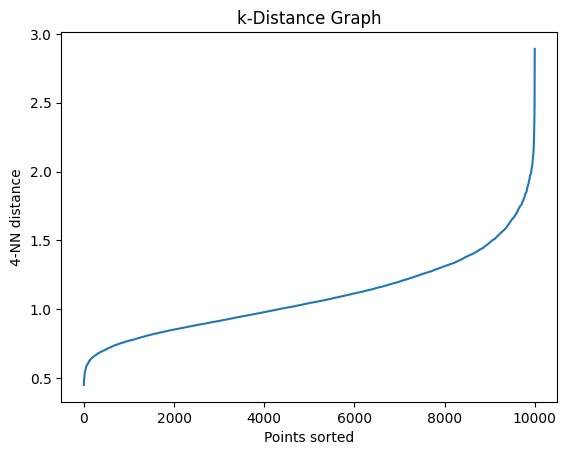

In [21]:
d_k_sorted = np.sort(d_k)
plt.plot(d_k_sorted)
plt.ylabel(f"{k}-NN distance")
plt.xlabel("Points sorted")
plt.title("k‑Distance Graph")
plt.show()


## DBSCAN grid search

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

best_score = -1
best_params = None

eps_values = np.linspace(0.5, 5.0, 10)      # initialized with arbitrary values
min_samp_values = [3, 5, 10, 20]

for eps in eps_values:
    for ms in min_samp_values:
        db = DBSCAN(eps=eps, min_samples=ms).fit(X)
        labels = db.labels_

        if len(set(labels)) > 1 and -1 not in set(labels):
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_params = (eps, ms)

print("Best Silhouette:", best_score)
print("Best (eps, min_samples):", best_params)


Best Silhouette: -1
Best (eps, min_samples): None
